In [34]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ruta = "C:\\Users\\comjpp01\\OneDrive\\Ingenieria de sistemas\\35_Analisis de datos\\Unidad 1 - Etapa 2 - Diseño de sistemas de aprendizaje automático\\archive"
df = pd.read_csv(Path(f'{ruta}\\Customers.csv'),delimiter=",", decimal= ',')

## Analisis Exploratorio de datos
### visualizar la estructura de los datos

In [3]:
#primera filas de los datos
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
#ultima fila de los datos
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


### ver la dimensión de los datos

In [5]:
df.shape

(2000, 8)

### ver el tipo de variables del dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


### visualizar estadisticas del dataframe

In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


### variables con valores Nan

In [8]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
df = df.drop(columns="CustomerID")

### grafica de barras variables categoricas

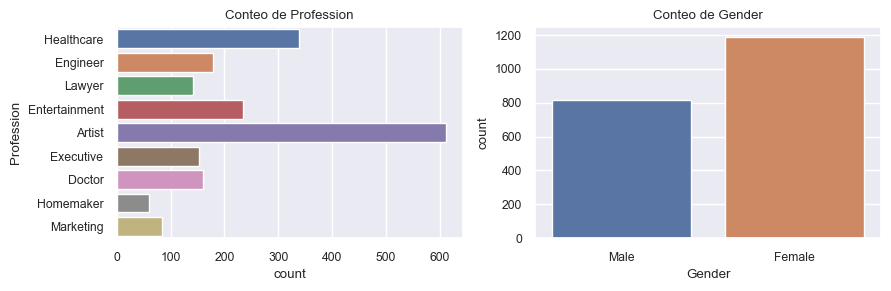

In [10]:
sns.set(font_scale=0.8) # disminuir la letra
fig, ax = plt.subplots(ncols=2, figsize=(9, 3)) # subtrama para agrupar graficos

sns.countplot(y='Profession', data=df, ax=ax[0]) 
ax[0].set_title('Conteo de Profession')

sns.countplot(x='Gender', data=df, ax=ax[1])
ax[1].set_title('Conteo de Gender')

plt.tight_layout()# Mostrar el gráfico

### graficas de cajas variables categoricas

<AxesSubplot: xlabel='Gender', ylabel='Family Size'>

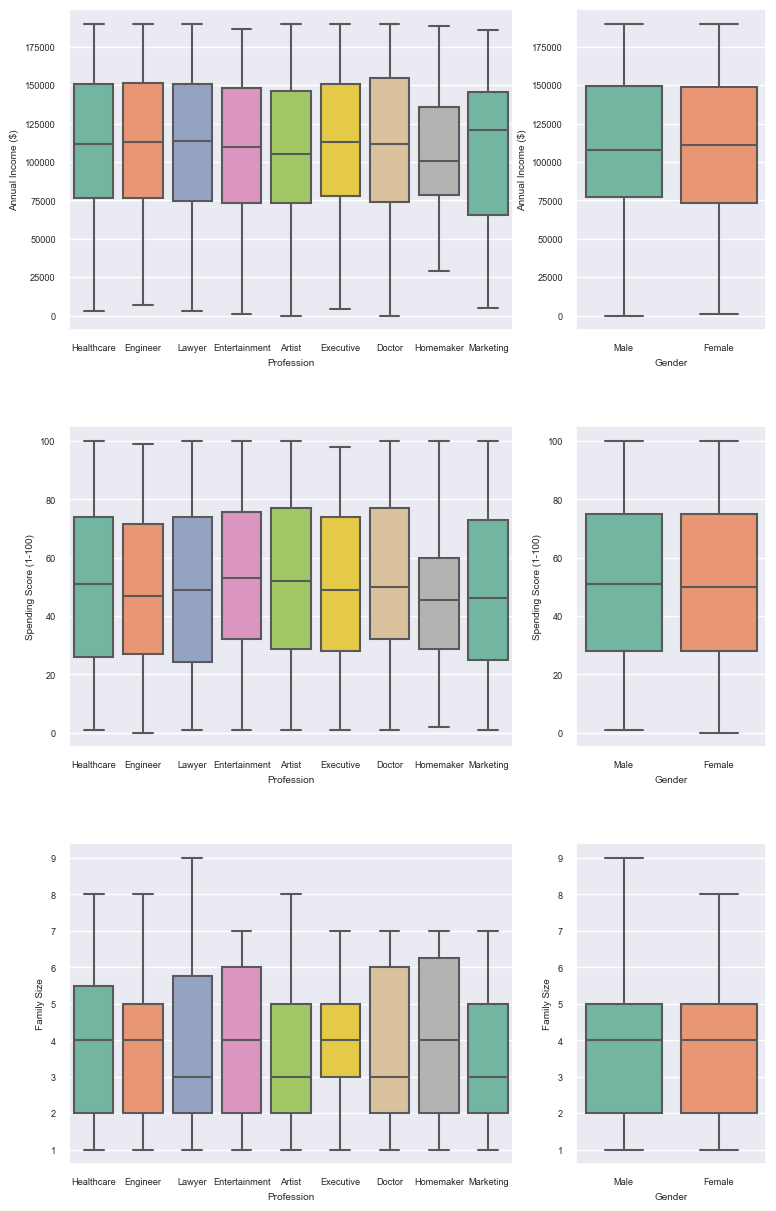

In [11]:
sns.set(font_scale=0.6) # disminuir la letra
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,15),gridspec_kw={'width_ratios': [7, 3]}) # subtrama para agrupar graficos
plt.subplots_adjust(hspace=0.3)# ajustar espacio

sns.boxplot(x=df['Profession'], y=df['Annual Income ($)'],ax=ax[0][0],palette='Set2')
sns.boxplot(x=df['Gender'], y=df['Annual Income ($)'],ax=ax[0][1],palette='Set2')


sns.boxplot(x=df['Profession'], y=df['Spending Score (1-100)'],ax=ax[1][0],palette='Set2')
sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'],ax=ax[1][1],palette='Set2')

sns.boxplot(x=df['Profession'], y=df['Family Size'],ax=ax[2][0],palette='Set2')
sns.boxplot(x=df['Gender'], y=df['Family Size'],ax=ax[2][1],palette='Set2')

#fig.suptitle('Distribución de estadísticas de bases de clientes',fontsize=13)

### Histogramas variables cuantitativas

<AxesSubplot: xlabel='Work Experience', ylabel='Count'>

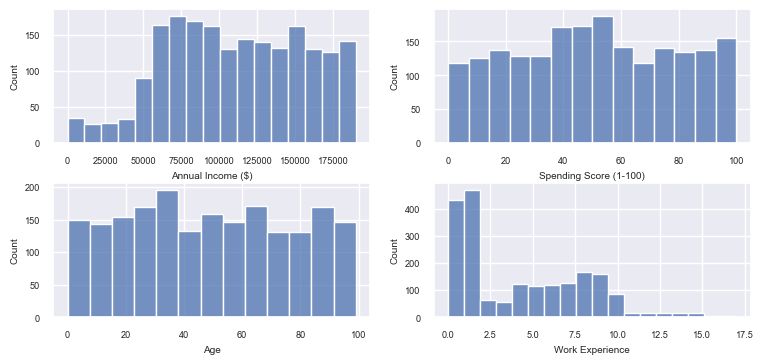

In [12]:
sns.set(font_scale=0.6) # disminuir la letra
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 4)) # subtrama para agrupar graficos
plt.subplots_adjust(hspace=0.3)# ajustar espacio

sns.histplot(df['Annual Income ($)'], kde=False, ax=ax[0][0])
sns.histplot(df['Spending Score (1-100)'], kde=False, ax=ax[0][1])
sns.histplot(df['Age'], kde=False, ax=ax[1][0])
sns.histplot(df['Work Experience'], kde=False, ax=ax[1][1])

#fig.suptitle('Distribución de estadísticas de bases de clientes',fontsize=13)

### Diagramas de disperción variables cuantitativas

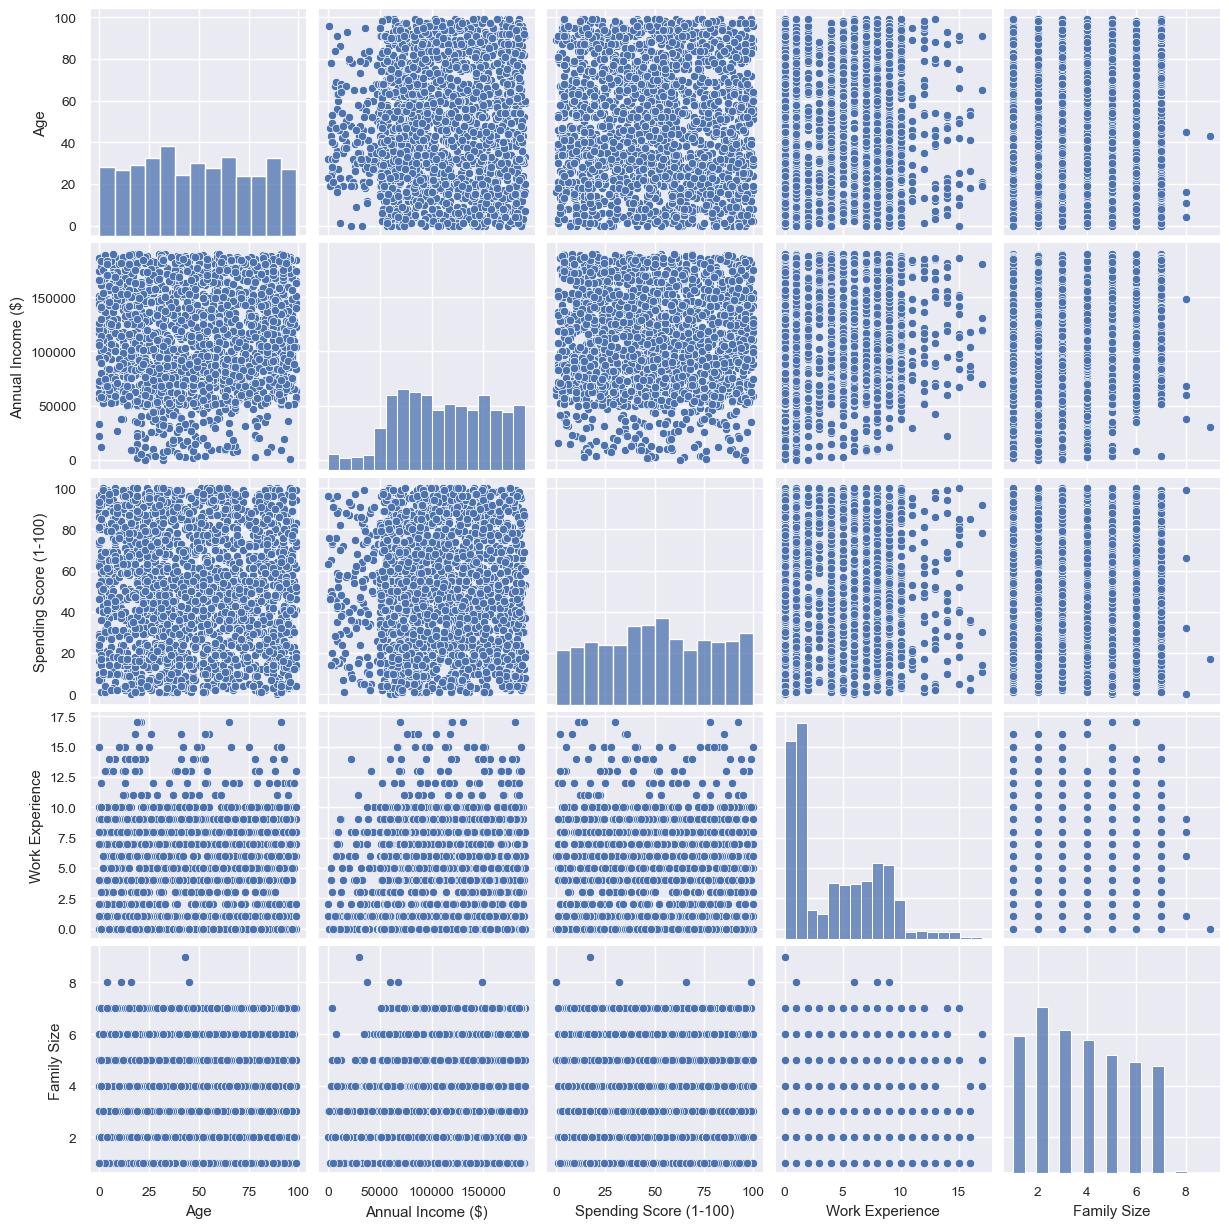

In [13]:
sns.set(font_scale=0.9) # disminuir la letra
sns.pairplot(df[['Age', 'Annual Income ($)','Spending Score (1-100)', 
                 'Work Experience','Family Size']])

### Matriz de correlación

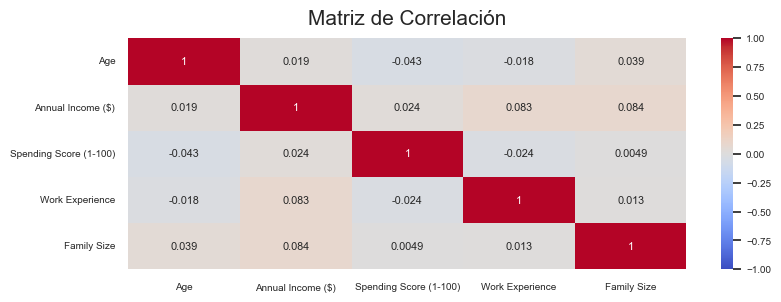

In [14]:
plt.figure(figsize=(9,3))
sns.set(font_scale=0.65) # disminuir la letra
heatmap= sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':15}, pad=10);

### Analisis de Outliers

In [15]:
#funcion para calcular valores atipicos
def outlier(df, col_name ):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    li  = q1-1.5*iqr
    ls = q3+1.5*iqr

    atipico = np.where((df[col_name] < li) | (df[col_name] > ls),1,0)
    return atipico

for col in df.select_dtypes(include='int'):
     df["atipico_"+col] =  outlier(df,col)

In [17]:
df["atipico"] = df[["atipico_Age","atipico_Annual Income ($)",
          "atipico_Spending Score (1-100)","atipico_Work Experience","atipico_Family Size"]].max(axis=1)

In [18]:
df.atipico.value_counts()

0    1995
1       5
Name: atipico, dtype: int64

In [19]:
df = df.loc[df["atipico"]==0,['Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience','Family Size']]

para poder entrenar el modelo se cambia las variables categoricas a numericas codificandolas con el siguiente codigo

In [21]:
# codificar la variable "Gender" utilizando one-hot encoding
df = pd.get_dummies(df, columns=['Gender','Profession'])

## Modelo de arbol de decisión para seleccion de variables

In [22]:
X = df.drop(columns='Spending Score (1-100)')
y = df['Spending Score (1-100)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Donde


* **X:** es una matriz que contiene los valores de las variables independientes.

* **y:** es un vector que contiene los valores de la variable dependiente.

* **test_size:** es el porcentaje de datos que se utilizarán para el conjunto de prueba.

* **random_state:** es una semilla para el generador de números aleatorios que se utiliza para garantizar que la división de los datos sea reproducible el numero 42 es convención en la comunidad de ciencia de datos.

* **X_train:** es el conjunto de datos de entrenamiento de las variables independientes.

* **X_test:** es el conjunto de datos de prueba de las variables independientes 

* **y_train:** es el conjunto de datos de entrenamiento de la variable dependiente.

* **y_test:** es el conjunto de datos de prueba de la variable dependiente.

In [28]:
arbol = DecisionTreeRegressor(random_state=42,max_leaf_nodes=7) # crrea el arbol de decision
arbol.fit(X_train, y_train) # entrenan los datos a partir de los datos de entrenamiento

DecisionTreeRegressor(max_leaf_nodes=7, random_state=42)

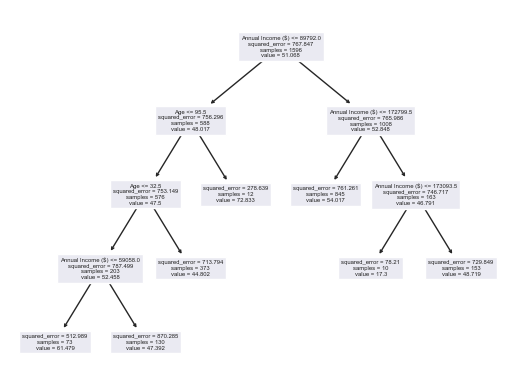

In [31]:
tree.plot_tree(arbol, feature_names=X.columns)
plt.show()

In [33]:
# Obtener la importancia de las variables
importancia = arbol.feature_importances_

# Mostrar la importancia de las variables en orden descendente
indice_ordenado = importancia.argsort()[::-1]
for i in indice_ordenado:
    print(f'{X_train.columns[i]}: {importancia[i]}')

Annual Income ($): 0.6924976171501805
Age: 0.3075023828498195
Profession_Marketing: 0.0
Profession_Lawyer: 0.0
Profession_Homemaker: 0.0
Profession_Healthcare: 0.0
Profession_Executive: 0.0
Profession_Entertainment: 0.0
Profession_Engineer: 0.0
Profession_Doctor: 0.0
Profession_Artist: 0.0
Gender_Male: 0.0
Gender_Female: 0.0
Family Size: 0.0
Work Experience: 0.0


### Validación de supuestos regresión Lineal

**Linealidad:** La relación entre la variable independiente y la variable dependiente debe ser lineal. 

**Homocedasticidad:** La varianza de los errores de predicción debe ser constante en todos los niveles de la variable independiente.

**Independencia:** Los errores de predicción deben ser independientes unos de otros y no deben estar correlacionados.

**Normalidad:** Los errores de predicción deben seguir una distribución normal. 

**Ausencia de multicolinealidad:** No debe haber una alta correlación entre las variables independientes.

### Prueba Shapiro- Wilk para supuesto de Normalidad

In [20]:
# Realizamos la prueba de Shapiro-Wilk

for col in df.select_dtypes(include='int'):
    
    stat, p = stats.shapiro(df[col])

    # Imprimimos los resultados
    print('')
    print('Estadístico de prueba:', stat)
    print('Valor p:', p)

    # Evaluamos el resultado
    if p > 0.05:
        print(f'No se rechaza la hipótesis nula de normalidad de la variable: {col}')
    else:
        print(f'Se rechaza la hipótesis nula de normalidad de la variable: {col}')


Estadístico de prueba: 0.9575706124305725
Valor p: 1.1305972637428361e-23
Se rechaza la hipótesis nula de normalidad de la variable: Age

Estadístico de prueba: 0.9734447002410889
Valor p: 9.01964047179992e-19
Se rechaza la hipótesis nula de normalidad de la variable: Annual Income ($)

Estadístico de prueba: 0.9631088376045227
Valor p: 3.8046718544776155e-22
Se rechaza la hipótesis nula de normalidad de la variable: Spending Score (1-100)

Estadístico de prueba: 0.8758831024169922
Valor p: 3.31521634554487e-37
Se rechaza la hipótesis nula de normalidad de la variable: Work Experience

Estadístico de prueba: 0.9215301275253296
Valor p: 4.947012492102238e-31
Se rechaza la hipótesis nula de normalidad de la variable: Family Size


## Modelo de regresión lineal

In [57]:
x = df[['Annual Income ($)','Age','Profession_Marketing','Profession_Lawyer','Profession_Homemaker',
'Profession_Healthcare','Profession_Executive','Profession_Entertainment',
'Profession_Engineer','Profession_Doctor','Profession_Artist',
'Gender_Male','Gender_Female','Family Size','Work Experience']]
y = df['Spending Score (1-100)']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
# Creamos el objeto del modelo
regresion = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
regresion.fit(X_train, y_train)

LinearRegression()

In [60]:
# Hacemos predicciones con los datos de prueba
y_pred = regresion.predict(X_test)

In [61]:
#print(f'Coeficientes:', regresion.coef_)
print(f'Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print(f'R^2: {r2_score(y_test, y_pred)}')

Error cuadrático medio: 827.10
R^2: -0.004473100394571494
